![alternative text](../../data/logistic_regression_chatgpt.png)


In [246]:
from torch import nn
import torch
import numpy as np
from matplotlib.pylab import plt
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import make_moons


In [340]:
# Let's reuse the functions we created in the linear and non linear regression notebook
class CustomDataset(Dataset):
    def __init__(self,X,Y):
        self.X = X.clone().detach()
        self.Y = Y.clone().detach()
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]
    
# let's make this a function 

def dataset(X,Y):
    dataset = CustomDataset(X,Y)
    train_size  = int(len(X) * 0.9 )
    valid_test_size  = int(0.1*len(X))

    train_dataset, valid_test_dataset = torch.utils.data.random_split(dataset, [train_size, valid_test_size])
    valid_dataset, test_dataset = torch.utils.data.random_split(valid_test_dataset, [valid_test_size//2, valid_test_size//2])


    batch_size = 32
    train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    valid_data_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=True)
    return train_data_loader, valid_data_loader, test_dataset

# training
def training(train_data_loader,valid_data_loader, criterion, optimizer,num_epochs ):
    train_losses = []
    val_losses   = []


    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for inputs, labels in train_data_loader:
            optimizer.zero_grad()
            output = model(inputs) # forward prop
            loss = criterion(output,labels)
            train_loss += loss.item()
            loss.backward()
            optimizer.step()

        train_losses.append(train_loss/len(train_data_loader))

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for val_input, val_labels in valid_data_loader:
                output = model(val_input) # forward prop
                val_loss += criterion(output,val_labels).item()

            val_losses.append(val_loss/len(valid_data_loader))

        if (epoch + 1)%10==0:
            print(f'epoch {epoch+1}, train loss:{train_losses[-1]:.4f} , valid loss:{val_losses[-1]:.4f}')
    plt.plot(train_losses)
    plt.plot(val_losses)
    plt.title("training and validation loss")
    plt.legend(["Training loss","validation loss"])
    plt.show()
    
def testing(test_dataset):
    Xs = []
    preds = []
    ys = []
    for x,y in test_dataset:
        with torch.no_grad():
            pred = model(x).detach().numpy()
            Xs.append(x.detach().numpy())
            ys.append(y.detach().numpy())
            preds.append(pred)
    Xs = np.array(Xs)
    fig, ax = plt.subplots(1,1 ,figsize = (5,5))
    ax.scatter(Xs[:,0],Xs[:,1],c=ys,alpha =0.5)
    ax.set_title("ground truth data")
    ax.scatter(Xs[:,0],Xs[:,1],c=np.array(preds)>0.5,alpha =0.5)
    ax.set_title("ground truth data")
    plt.show()
    return np.array(ys) , np.array(preds)
    
def plot_decision_boundary(model, X, Y):
    plt.figure(figsize=(8, 6))
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    input_ = torch.tensor(np.c_[xx.ravel(), yy.ravel()],dtype = torch.float32)
    Z = model(input_).detach().numpy()
    Z = Z.reshape(xx.shape)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

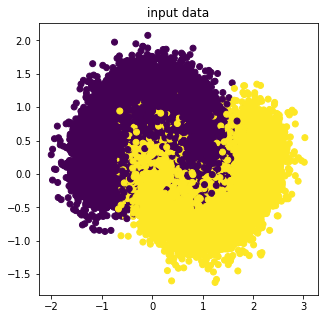

In [341]:
X, Y = make_moons(n_samples=35000, noise=0.3, random_state=42)


fig, ax = plt.subplots(1,1 ,figsize = (5,5))
ax.scatter(X[:,0],X[:,1],c=Y)
ax.set_title("input data")
plt.show()


X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.float32)
Y = torch.unsqueeze(Y, 1)
train_data_loader, valid_data_loader, test_dataset = dataset(X,Y)

In [342]:
class LogisticRegression(nn.Module):
    
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        
        self.linear1 = nn.Linear(input_size, 256)
        self.linear2 = nn.Linear(256, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self,x ):
        x  = self.linear1(x)
        x2 = self.linear2(x)
        x  = self.sigmoid(x2)
        
        return x 

In [343]:
input_size = X.shape[1] # number of features
model = LogisticRegression(input_size)
criterion = nn.BCELoss() # binary cross entropy 
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0001)
num_epochs = 250

epoch 10, train loss:0.3501 , valid loss:0.3336
epoch 20, train loss:0.3381 , valid loss:0.3205
epoch 30, train loss:0.3358 , valid loss:0.3169
epoch 40, train loss:0.3349 , valid loss:0.3166
epoch 50, train loss:0.3350 , valid loss:0.3153
epoch 60, train loss:0.3348 , valid loss:0.3147
epoch 70, train loss:0.3349 , valid loss:0.3150
epoch 80, train loss:0.3348 , valid loss:0.3162
epoch 90, train loss:0.3348 , valid loss:0.3156
epoch 100, train loss:0.3347 , valid loss:0.3164
epoch 110, train loss:0.3348 , valid loss:0.3155
epoch 120, train loss:0.3347 , valid loss:0.3158
epoch 130, train loss:0.3348 , valid loss:0.3146
epoch 140, train loss:0.3347 , valid loss:0.3153
epoch 150, train loss:0.3347 , valid loss:0.3150
epoch 160, train loss:0.3347 , valid loss:0.3162
epoch 170, train loss:0.3347 , valid loss:0.3148
epoch 180, train loss:0.3348 , valid loss:0.3155
epoch 190, train loss:0.3348 , valid loss:0.3150
epoch 200, train loss:0.3347 , valid loss:0.3153
epoch 210, train loss:0.3347 

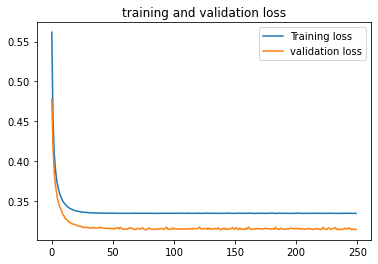

In [344]:
training(train_data_loader, valid_data_loader,  criterion, optimizer,num_epochs)

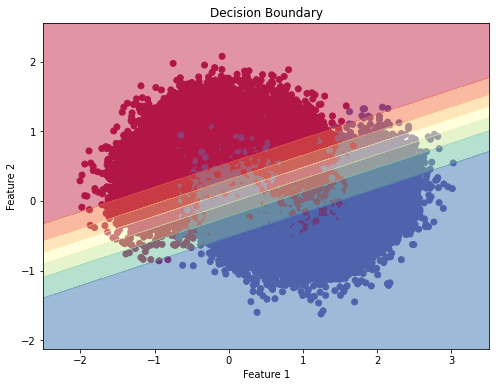

In [345]:
plot_decision_boundary(model,X, Y)

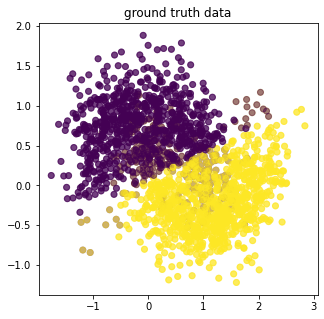

(array([[0.],
        [0.],
        [1.],
        ...,
        [0.],
        [0.],
        [1.]], dtype=float32),
 array([[0.41990775],
        [0.30055225],
        [0.9558722 ],
        ...,
        [0.89042664],
        [0.05618842],
        [0.6001972 ]], dtype=float32))

In [346]:
_= testing(test_dataset)
# here you can see logistic regression is making mistake putting the purpel classes as yellow classes

As you can see the decision boundary for logistic regression is linear. The sigmoid layer introduces non-lineary to the probabilities of each class. Logistic Regression is still a linear classifier where the decision boundary is hyperplane that is a linear-weighted combination of the input features. Think about it, decision boundary here is when P(y=1|x) = 0.5. If you do the math, 

    1/(1+exp(-x)) = 0.5 => 
    1+exp(-x) = 2
    exp(-x) = 1
    x = 0 
    And what was x? WX + B => that's a linear line. 


If we want to explore a non-linear decision, then we should introduce that non-linearity on the features themselves. Let's take a look at simple neural network. 

In [347]:
class SimpleNN(nn.Module):
    
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        
        self.linear1 = nn.Linear(input_size, 64)
        self.linear2 = nn.Linear(64, 32)
        self.linear3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()
    
    def forward(self,x ):
        x  = self.relu(self.linear1(x))
        x2 = self.relu(self.linear2(x))
        x3 = self.linear3(x2)
        x  = self.sigmoid(x3)
        
        return x 

In [348]:
input_size = X.shape[1] # number of features
model = SimpleNN(input_size)
criterion = nn.BCELoss() # binary cross entropy 
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)
num_epochs = 250

epoch 10, train loss:0.3330 , valid loss:0.3127
epoch 20, train loss:0.3116 , valid loss:0.2924
epoch 30, train loss:0.2927 , valid loss:0.2734
epoch 40, train loss:0.2717 , valid loss:0.2542
epoch 50, train loss:0.2518 , valid loss:0.2339
epoch 60, train loss:0.2366 , valid loss:0.2204
epoch 70, train loss:0.2271 , valid loss:0.2106
epoch 80, train loss:0.2218 , valid loss:0.2048
epoch 90, train loss:0.2189 , valid loss:0.2023
epoch 100, train loss:0.2174 , valid loss:0.1993
epoch 110, train loss:0.2162 , valid loss:0.1983
epoch 120, train loss:0.2157 , valid loss:0.1981
epoch 130, train loss:0.2151 , valid loss:0.1972
epoch 140, train loss:0.2147 , valid loss:0.1978
epoch 150, train loss:0.2145 , valid loss:0.1956
epoch 160, train loss:0.2141 , valid loss:0.1973
epoch 170, train loss:0.2139 , valid loss:0.1951
epoch 180, train loss:0.2138 , valid loss:0.1951
epoch 190, train loss:0.2138 , valid loss:0.1945
epoch 200, train loss:0.2135 , valid loss:0.1967
epoch 210, train loss:0.2134 

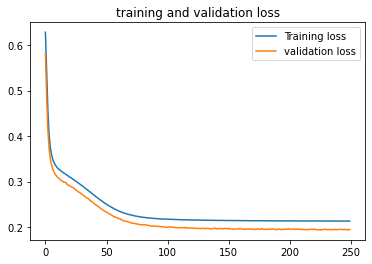

In [349]:
training(train_data_loader, valid_data_loader,  criterion, optimizer,num_epochs)

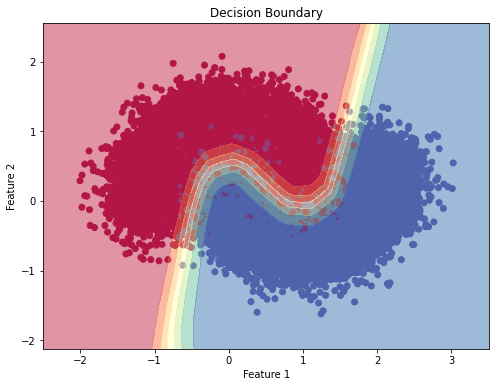

In [350]:
plot_decision_boundary(model,X, Y)
# as you can see the decision boundary for our simple neural network is non-linear

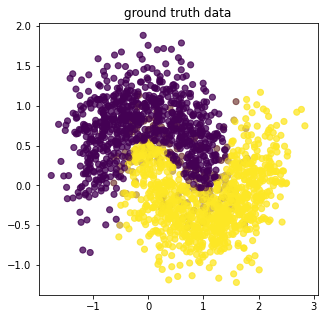

(array([[0.],
        [0.],
        [1.],
        ...,
        [0.],
        [0.],
        [1.]], dtype=float32),
 array([[3.9698690e-02],
        [7.8963727e-04],
        [9.9480927e-01],
        ...,
        [7.7432573e-01],
        [1.3462938e-01],
        [3.0911028e-01]], dtype=float32))

In [351]:
_= testing(test_dataset)
# and the test set is conserve that non-linear relationship as well. 

But, now let's add more layers and neuron and create a giant model. What could happen?

In [352]:
class OverKillNN(nn.Module):
    
    def __init__(self, input_size):
        super(OverKillNN, self).__init__()
        
        self.linear1 = nn.Linear(input_size, 1024)
        self.linear2 = nn.Linear(1024, 768)
        self.linear3 = nn.Linear(768, 512)
        self.linear4 = nn.Linear(512, 256)
        self.linear5 = nn.Linear(256, 128)
        self.linear6 = nn.Linear(128, 64)
        self.linear7 = nn.Linear(64, 32)
        self.linear8 = nn.Linear(32, 16)
        self.linear9 = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()
    
    def forward(self,x ):
        x2  = self.relu(self.linear1(x))
        x3  = self.relu(self.linear2(x2))
        x4  = self.relu(self.linear3(x3))
        x5  = self.relu(self.linear4(x4))
        x6  = self.relu(self.linear5(x5))
        x7  = self.relu(self.linear6(x6))
        x8  = self.relu(self.linear7(x7))
        x9  = self.relu(self.linear8(x8))
        x10 = self.linear9(x9)
        x   = self.sigmoid(x10)
        
        return x 

In [353]:
input_size = X.shape[1] # number of features
model = OverKillNN(input_size)
criterion = nn.BCELoss() # binary cross entropy 
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
num_epochs = 550

In [ ]:
training(train_data_loader, valid_data_loader,  criterion, optimizer,num_epochs)

epoch 10, train loss:0.2181 , valid loss:0.1938
epoch 20, train loss:0.2154 , valid loss:0.1940


Training and validation loss didn't decrease all that much from our original simple NN, although our decision boundary is thinner. 

In [ ]:
plot_decision_boundary(model,X, Y)

In [ ]:
labels , predictions = testing(test_dataset)

So, far we're looking at the loss and visualizing the dataset. But, we should be doing this objectivly. 

In [ ]:
import sklearn.metrics as metrics

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(labels, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.title('ROC')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
cm = metrics.confusion_matrix(labels, predictions>0.5)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()
# about similar performance on FP and FN 

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)


In [ ]:
for p in net.parameters():
  l1 = l1 + p.abs().sum()
 loss = loss + lambda_l1 * l1